In [ ]:
!pip install pycaret

In [ ]:
!apt-get -y install fonts-ipafont-
!pip install japanize-matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'fonts-ipafont' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import japanize_matplotlib

In [ ]:
import matplotlib.font_manager as fm

# 利用可能なフォントを表示
for font in fm.fontManager.ttflist:
    if 'IPA' in font.name:  # IPAフォントを検索
        print(font.name, font.fname)

IPAexGothic /usr/local/lib/python3.10/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test (1).csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other,0
1,1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown,1
2,2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure,0
3,3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure,0
4,4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27100 non-null  int64 
 1   age        27100 non-null  int64 
 2   job        27100 non-null  object
 3   marital    27100 non-null  object
 4   education  27100 non-null  object
 5   default    27100 non-null  object
 6   balance    27100 non-null  int64 
 7   housing    27100 non-null  object
 8   loan       27100 non-null  object
 9   contact    27100 non-null  object
 10  day        27100 non-null  int64 
 11  month      27100 non-null  object
 12  duration   27100 non-null  int64 
 13  campaign   27100 non-null  int64 
 14  pdays      27100 non-null  int64 
 15  previous   27100 non-null  int64 
 16  poutcome   27100 non-null  object
 17  y          27100 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [ ]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,13549.500000,36.073284,47682.901771,16.747528,229.325387,1.775830,432.482399,0.085720,0.077934
std,7823.240484,7.816417,31650.760036,8.569529,204.939958,0.950045,252.150648,0.365889,0.268072
min,0.000000,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6774.750000,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000,0.000000
50%,13549.500000,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000,0.000000
75%,20324.250000,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000,0.000000
max,27099.000000,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000,1.000000


In [ ]:
# int64型とobject型に分ける
train_int = train.select_dtypes(include='int64')
train_obj = train.select_dtypes(include='object')

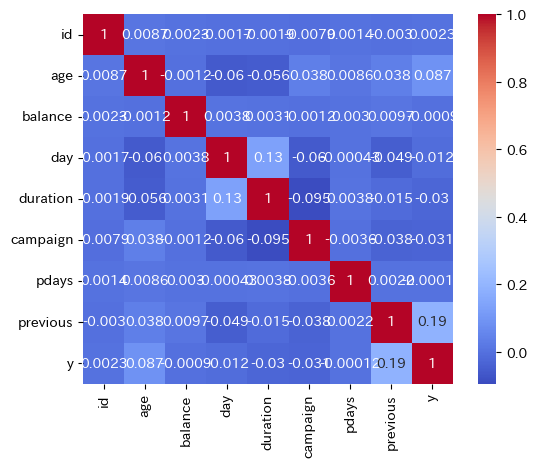

In [ ]:
# 相関行列を作成
corr_matrix = train_int.corr()

# ヒートマップを作成
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# プロットを表示
plt.show()

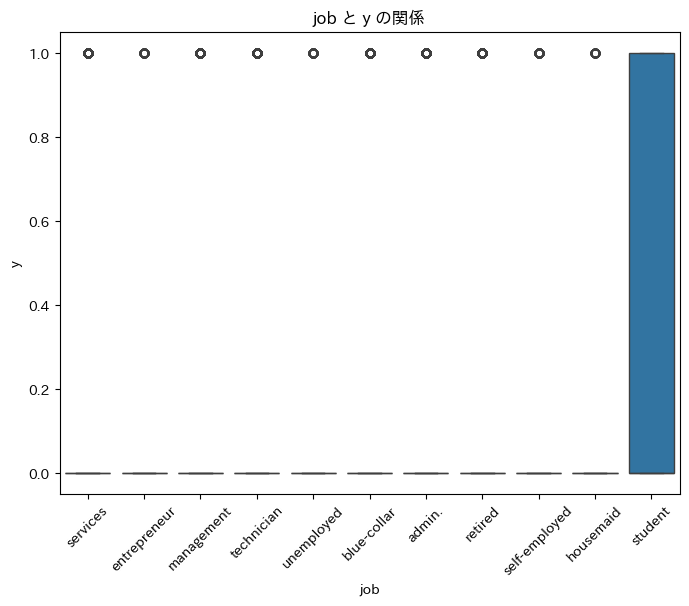

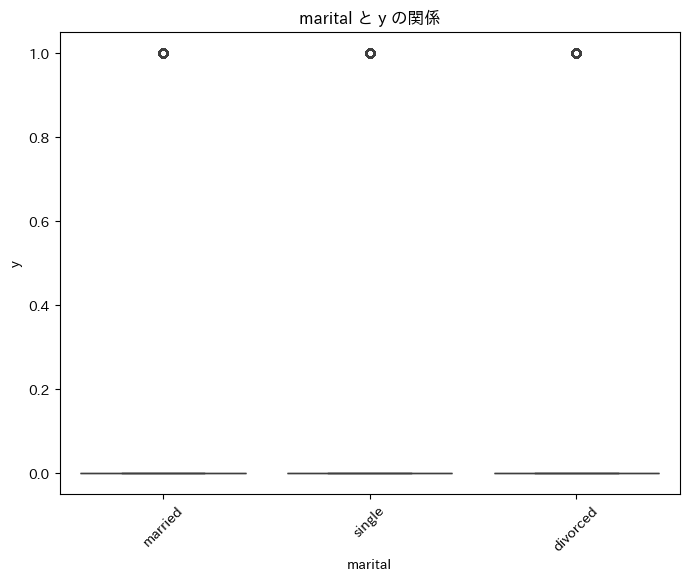

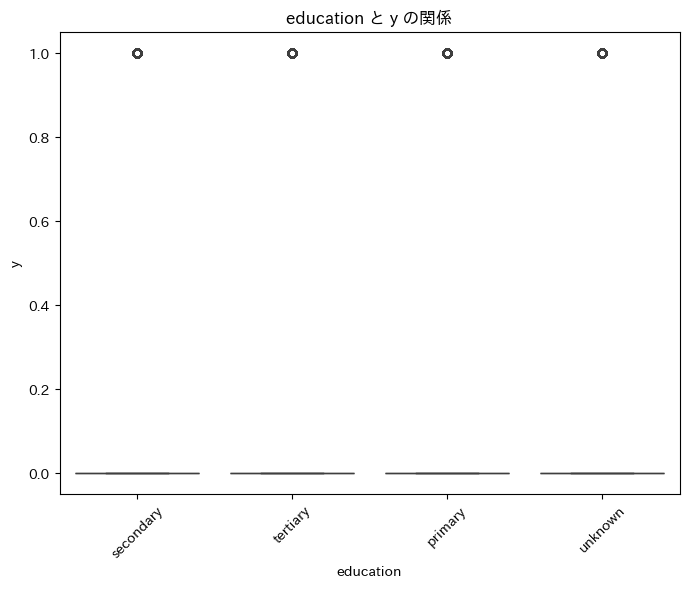

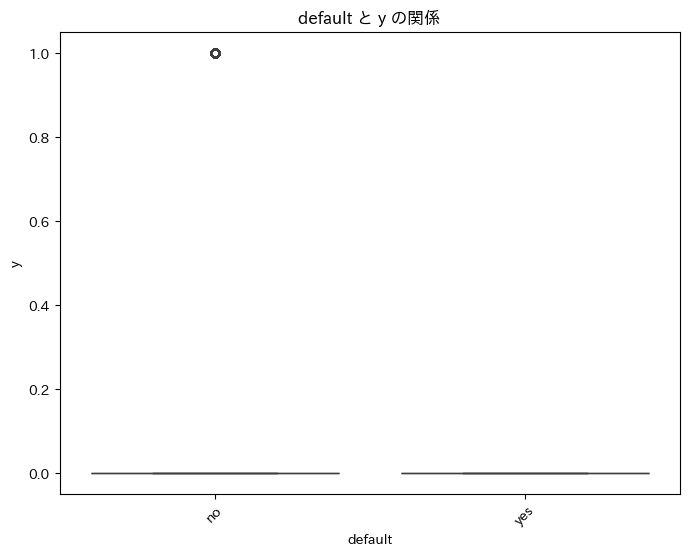

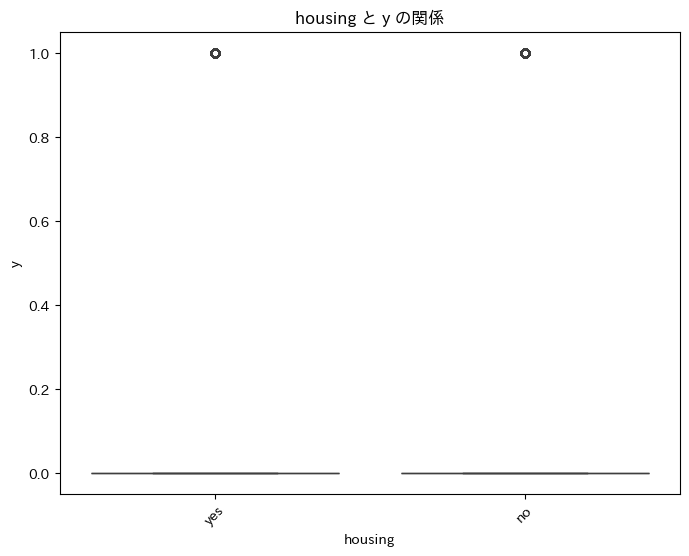

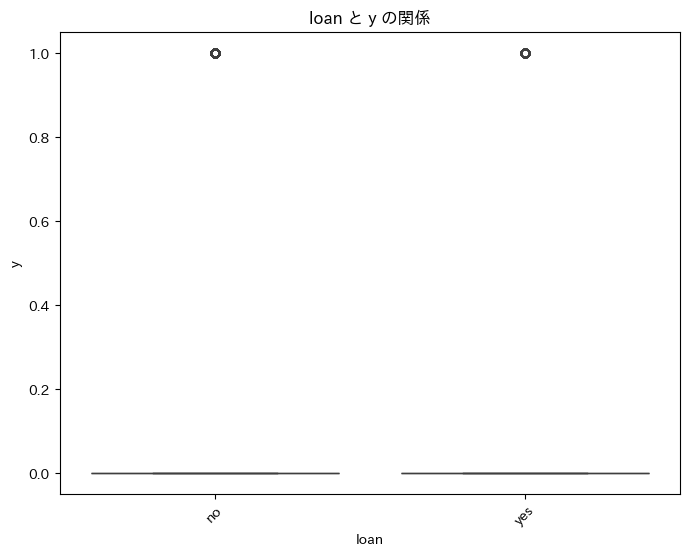

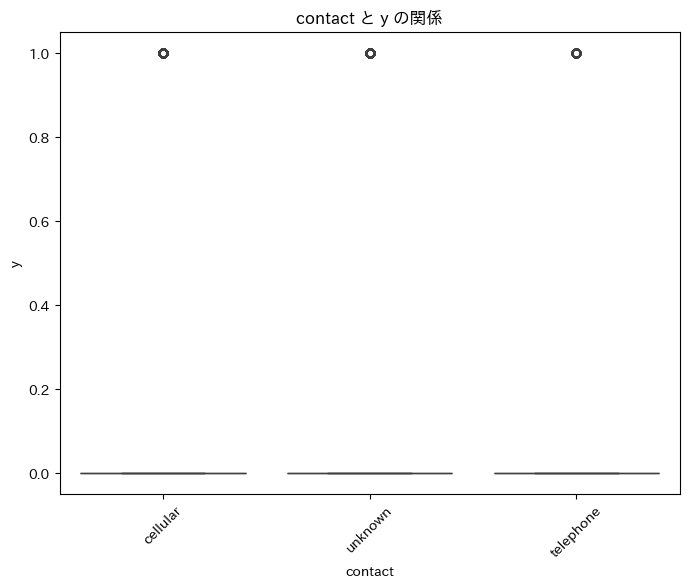

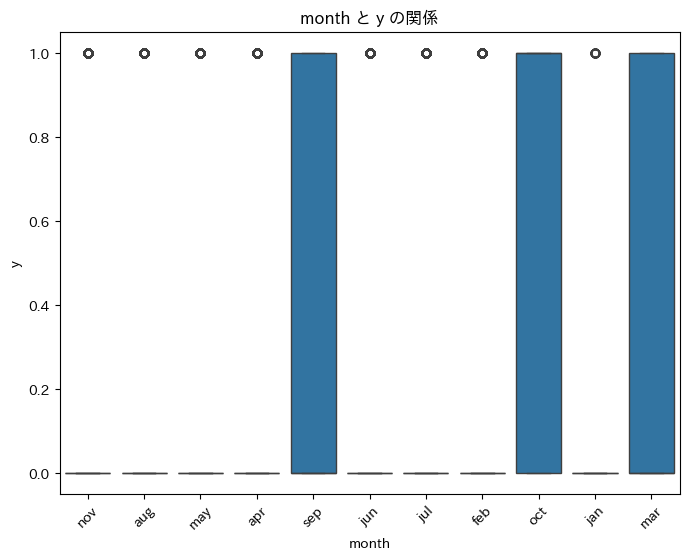

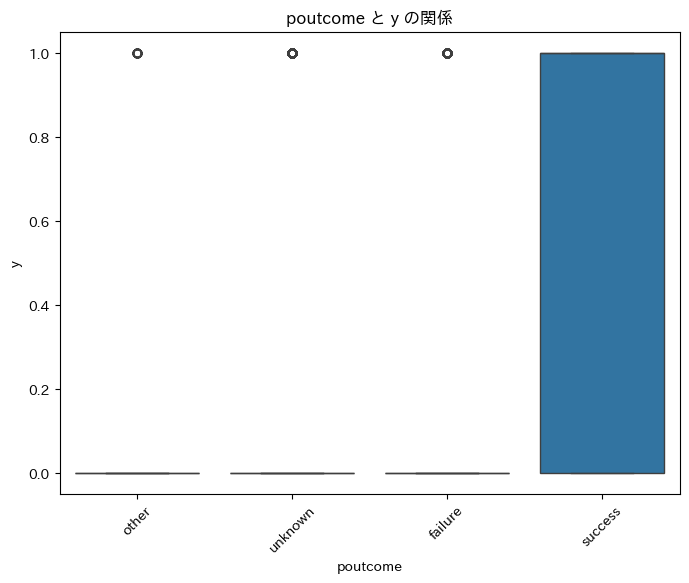

In [ ]:
# train_obj の各特徴量に対してループ処理
for column in train_obj.columns:
    # 箱ひげ図を作成
    plt.figure(figsize=(8, 6))  # 図のサイズを指定
    sns.boxplot(x=column, y='y', data=pd.concat([train_obj, train_int['y']], axis=1))
    plt.title(f'{column} と y の関係')  # タイトルを設定
    plt.xticks(rotation=45)  # x軸のラベルを回転
    plt.show()

In [ ]:
import statsmodels.formula.api as sm
# 仮説検定
# train_obj の各特徴量に対してループ処理
for column in train_obj.columns:
    # モデルを作成
    model = sm.ols(formula=f'y ~ {column}', data=pd.concat([train_obj, train_int['y']], axis=1))

    # モデルを推定
    results = model.fit()

    # 結果を表示
    print(f'{column} と y の関係:')
    print(results.summary())

job と y の関係:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     52.58
Date:                Fri, 22 Nov 2024   Prob (F-statistic):          1.52e-105
Time:                        02:52:10   Log-Likelihood:                -2515.1
No. Observations:               27100   AIC:                             5052.
Df Residuals:                   27089   BIC:                             5142.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept          

In [ ]:
# durationを削除する
train = train.drop('duration', axis=1)
test = test.drop('duration', axis=1)

In [ ]:
from pycaret.classification import *

# データのセットアップ
clf1 = setup(data=train, target='y', session_id=123,fix_imbalance=True)

# モデルの比較
best_model = compare_models()

# モデルの作成
model = create_model(best_model)  # compare_models() で選択された最適なモデルを作成

# モデルのチューニング
tuned_model = tune_model(model)

# モデルの評価
evaluate_model(tuned_model)

# モデルの予測 (test データに対して)
predictions = predict_model(tuned_model, data=test)

# モデルの保存
save_model(tuned_model, 'my_model')

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 17)"
4,Transformed data shape,"(43114, 47)"
5,Transformed train set shape,"(34984, 47)"
6,Transformed test set shape,"(8130, 47)"
7,Numeric features,7
8,Categorical features,9
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9300,0.8333,0.2023,0.6717,0.3105,0.2847,0.3430,8.4870
rf,Random Forest Classifier,0.9298,0.7950,0.1672,0.7152,0.2703,0.2481,0.3231,5.3910
gbc,Gradient Boosting Classifier,0.9296,0.8175,0.2104,0.6467,0.3170,0.2900,0.3419,16.1780
xgboost,Extreme Gradient Boosting,0.9284,0.8151,0.2246,0.6091,0.3278,0.2984,0.3406,2.3450
et,Extra Trees Classifier,0.9266,0.7775,0.2138,0.5806,0.3119,0.2817,0.3218,4.7660
ada,Ada Boost Classifier,0.9243,0.8073,0.2476,0.5299,0.3374,0.3028,0.3277,3.6030
dummy,Dummy Classifier,0.9221,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5940
dt,Decision Tree Classifier,0.8778,0.5990,0.2687,0.2430,0.2548,0.1885,0.1890,0.6730
lda,Linear Discriminant Analysis,0.7807,0.8052,0.6766,0.2138,0.3248,0.2341,0.2899,0.4760
ridge,Ridge Classifier,0.7805,0.8052,0.6766,0.2136,0.3246,0.2339,0.2897,0.3750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9278,0.8192,0.2177,0.5926,0.3184,0.2888,0.3298
1,0.9336,0.8425,0.2177,0.7442,0.3368,0.3127,0.3797
2,0.9299,0.8338,0.1824,0.6923,0.2888,0.2648,0.3318
3,0.9251,0.8007,0.1689,0.5682,0.2604,0.2330,0.2816
4,0.9294,0.8659,0.2027,0.6522,0.3093,0.2827,0.3375
5,0.9320,0.8400,0.2027,0.7317,0.3175,0.2935,0.3623
6,0.9304,0.8289,0.2027,0.6818,0.3125,0.2870,0.3469
7,0.9309,0.8092,0.2230,0.6735,0.3350,0.3082,0.3615
8,0.9283,0.8344,0.1892,0.6364,0.2917,0.2654,0.3208


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9262,0.8192,0.2109,0.5636,0.3069,0.2764,0.3142
1,0.9357,0.8606,0.2585,0.7451,0.3838,0.3582,0.4150
2,0.9341,0.8501,0.2432,0.7347,0.3655,0.3399,0.3987
3,0.9257,0.8152,0.1622,0.5854,0.2540,0.2278,0.2812
4,0.9325,0.8694,0.2230,0.7174,0.3402,0.3149,0.3758
5,0.9367,0.8372,0.2635,0.7800,0.3939,0.3691,0.4306
6,0.9341,0.8394,0.2162,0.7805,0.3386,0.3155,0.3893
7,0.9278,0.8217,0.2095,0.6078,0.3116,0.2829,0.3284
8,0.9315,0.8299,0.2027,0.7143,0.3158,0.2913,0.3570


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'age', 'balance', 'day',
                                              'campaign', 'pdays', 'previous'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, f

In [ ]:
from pycaret.classification import load_model
loaded_model = load_model('my_model')

FileNotFoundError: [Errno 2] No such file or directory: 'my_model.pkl'

Transformation Pipeline and Model Successfully Loaded


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9278,0.8192,0.2177,0.5926,0.3184,0.2888,0.3298
1,0.9336,0.8425,0.2177,0.7442,0.3368,0.3127,0.3797
2,0.9299,0.8338,0.1824,0.6923,0.2888,0.2648,0.3318
3,0.9251,0.8007,0.1689,0.5682,0.2604,0.2330,0.2816
4,0.9294,0.8659,0.2027,0.6522,0.3093,0.2827,0.3375
5,0.9320,0.8400,0.2027,0.7317,0.3175,0.2935,0.3623
6,0.9304,0.8289,0.2027,0.6818,0.3125,0.2870,0.3469
7,0.9309,0.8092,0.2230,0.6735,0.3350,0.3082,0.3615
8,0.9283,0.8344,0.1892,0.6364,0.2917,0.2654,0.3208


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


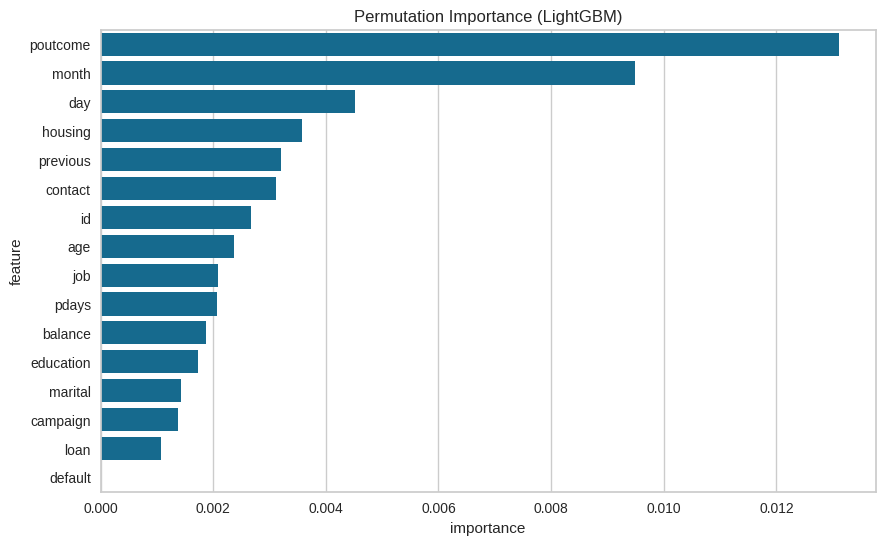

In [ ]:
from pycaret.classification import *
from sklearn.inspection import permutation_importance

loaded_model = load_model('my_model')  # モデルのロード

X_train = get_config('X_train')
y_train = get_config('y_train')

# LightGBM モデルを作成
lightgbm_model = create_model('lightgbm')

# X_train はモデルの学習に使用したデータの特徴量、y_train は目的変数
result = permutation_importance(
    estimator=loaded_model,  # または model
    X=X_train,
    y=y_train,
    scoring='accuracy',  # 分類タスクの場合 (必要に応じて変更)
    n_repeats=10,  # シャッフルの繰り返し回数
    random_state=123,  # 乱数シード
    n_jobs=-1,  # 並列処理 (使用可能なすべてのコアを使用)
)

# ここで importances を定義
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Permutation Importance (LightGBM)')
plt.show()

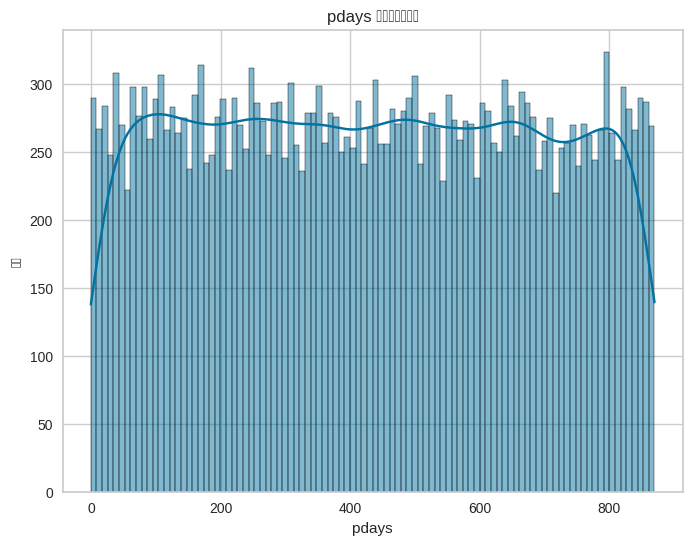

In [ ]:
# Pdaysを可視化
plt.figure(figsize=(8, 6))
sns.histplot(train['pdays'], bins=100, kde=True)  # bins: ビンの数, kde: カーネル密度推定
plt.title('pdays のヒストグラム')
plt.xlabel('pdays')
plt.ylabel('度数')
plt.show()

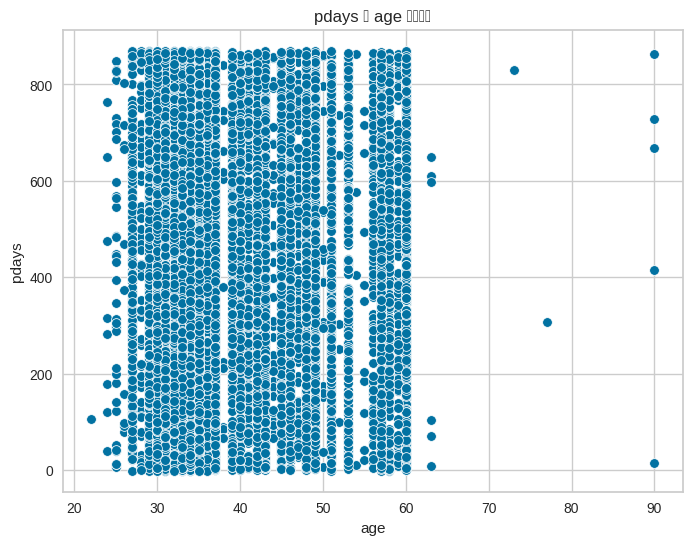

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='pdays', data=train)  # x軸に 'age', y軸に 'pdays' を指定
plt.title('pdays と age の散布図')
plt.xlabel('age')
plt.ylabel('pdays')
plt.show()

In [ ]:
predictions.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,prediction_label,prediction_score
0,0,35,technician,single,secondary,no,89043,no,no,cellular,7,feb,2,184,2,success,1,0.8418
1,1,37,services,married,secondary,no,64372,yes,no,cellular,7,jul,3,241,0,unknown,0,0.9091
2,2,31,services,single,secondary,no,31606,yes,no,unknown,15,may,2,47,0,unknown,0,0.9801
3,3,31,admin.,married,secondary,no,94826,yes,no,cellular,27,may,2,490,0,unknown,0,0.9876
4,4,32,services,married,secondary,no,100401,no,no,cellular,7,jan,1,686,0,other,0,0.9285


In [ ]:
train['month'].value_counts()

,count
month,
may,11232
aug,3381
jul,3307
jun,3086
nov,2307
apr,2005
feb,1083
jan,361
mar,214


In [ ]:
# monthカラムを数値に変換する辞書を作成
month_map = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

# trainデータとtestデータの両方に適用
for df in [train, test]:
    # map()関数を使用して、辞書に基づいてmonthカラムの値を数値に変換
    df['month_int'] = df['month'].map(month_map)

    # 新しいカラムのデータ型をint型に変換
    df['month_int'] = df['month_int'].astype(int)

    # 元のmonthカラムを削除 (必要であれば)
    df.drop('month', axis=1, inplace=True)

In [ ]:
train['poutcome'].value_counts()

,count
poutcome,
unknown,23099
failure,2717
other,826
success,458


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoderのインスタンスを作成
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# trainデータとtestデータをリストに格納
dfs = [train, test]

# リストのインデックスを使ってDataFrameを更新
for i in range(len(dfs)):
    # poutcomeカラムをエンコーディング
    encoded_data = encoder.fit_transform(dfs[i][['poutcome']])

    # エンコードされたデータをDataFrameに変換
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['poutcome']))

    # 元のデータフレームに結合
    dfs[i] = pd.concat([dfs[i], encoded_df], axis=1)

    # 元のpoutcomeカラムを削除
    dfs[i].drop('poutcome', axis=1, inplace=True)

# リストからtrainとtestを再代入
train, test = dfs[0], dfs[1]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                27100 non-null  int64  
 1   age               27100 non-null  int64  
 2   job               27100 non-null  object 
 3   marital           27100 non-null  object 
 4   education         27100 non-null  object 
 5   default           27100 non-null  object 
 6   balance           27100 non-null  int64  
 7   housing           27100 non-null  object 
 8   loan              27100 non-null  object 
 9   contact           27100 non-null  object 
 10  day               27100 non-null  int64  
 11  campaign          27100 non-null  int64  
 12  pdays             27100 non-null  int64  
 13  previous          27100 non-null  int64  
 14  y                 27100 non-null  int64  
 15  month_int         27100 non-null  int64  
 16  poutcome_failure  27100 non-null  float6

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 20)"
4,Transformed data shape,"(27100, 20)"
5,Transformed train set shape,"(18970, 20)"
6,Transformed test set shape,"(8130, 20)"
7,Numeric features,5
8,Categorical features,7


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9304,0.8227,0.2041,0.6667,0.3125,0.2866,0.3435
1,0.9320,0.8461,0.2245,0.6875,0.3385,0.3122,0.3676
2,0.9299,0.8352,0.1959,0.6744,0.3037,0.2783,0.3387
3,0.9278,0.7879,0.1689,0.6410,0.2674,0.2427,0.3041
4,0.9304,0.8600,0.1959,0.6905,0.3053,0.2804,0.3436
5,0.9341,0.8353,0.2027,0.8108,0.3243,0.3026,0.3854
6,0.9325,0.8242,0.2162,0.7273,0.3333,0.3086,0.3730
7,0.9309,0.8033,0.1892,0.7179,0.2995,0.2759,0.3457
8,0.9288,0.8303,0.1554,0.6970,0.2541,0.2323,0.3071


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

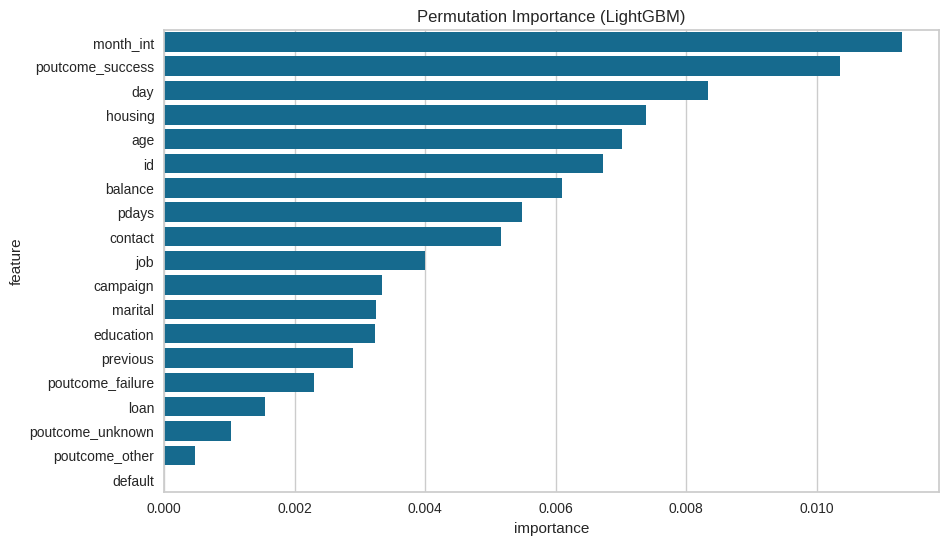

In [ ]:
from pycaret.classification import *
from sklearn.inspection import permutation_importance

# PyCaretのsetupを再度実行
clf1 = setup(data=train, target='y', session_id=123, fix_imbalance=True,
             preprocess=False, # 前処理をスキップ
             numeric_features = ['month_int'] + list(encoder.get_feature_names_out(['poutcome'])))  # 数値特徴量を指定
# 前処理済みのデータを使用するように設定

model = create_model('lightgbm')

# パーミュテーションインポータンスを計算
X_train = get_config('X_train')
y_train = get_config('y_train')

result = permutation_importance(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring='accuracy',
    n_repeats=10,
    random_state=123,
    n_jobs=-1
)

# 結果を可視化
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Permutation Importance (LightGBM)')
plt.show()

In [ ]:
# # jobをワンホットエンコーディングする
# train = pd.get_dummies(train, columns=['job'])
# test = pd.get_dummies(test, columns=['job'])

In [ ]:
# # matelialをワンホットエンコーディングする
# train = pd.get_dummies(train, columns=['marital'])
# test = pd.get_dummies(test, columns=['marital'])

In [ ]:
# # educationをワンホットエンコーディング
# train = pd.get_dummies(train, columns=['education'])
# test = pd.get_dummies(test, columns=['education'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   27100 non-null  int64  
 1   age                  27100 non-null  int64  
 2   default              27100 non-null  object 
 3   balance              27100 non-null  int64  
 4   housing              27100 non-null  object 
 5   loan                 27100 non-null  object 
 6   contact              27100 non-null  object 
 7   day                  27100 non-null  int64  
 8   campaign             27100 non-null  int64  
 9   pdays                27100 non-null  int64  
 10  previous             27100 non-null  int64  
 11  y                    27100 non-null  int64  
 12  month_int            27100 non-null  int64  
 13  poutcome_failure     27100 non-null  float64
 14  poutcome_other       27100 non-null  float64
 15  poutcome_success     27100 non-null 

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 35)"
4,Transformed data shape,"(27100, 35)"
5,Transformed train set shape,"(18970, 35)"
6,Transformed test set shape,"(8130, 35)"
7,Numeric features,5
8,Categorical features,4


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9267,0.8245,0.1973,0.5800,0.2944,0.2655,0.3092
1,0.9352,0.8454,0.2313,0.7727,0.3560,0.3322,0.4007
2,0.9273,0.8350,0.1757,0.6190,0.2737,0.2477,0.3035
3,0.9262,0.7841,0.1486,0.6111,0.2391,0.2152,0.2765
4,0.9309,0.8557,0.2027,0.6977,0.3141,0.2892,0.3519
5,0.9325,0.8345,0.1959,0.7632,0.3118,0.2892,0.3652
6,0.9320,0.8305,0.2230,0.7021,0.3385,0.3126,0.3709
7,0.9267,0.8077,0.1892,0.5957,0.2872,0.2593,0.3077
8,0.9304,0.8281,0.1824,0.7105,0.2903,0.2670,0.3372


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

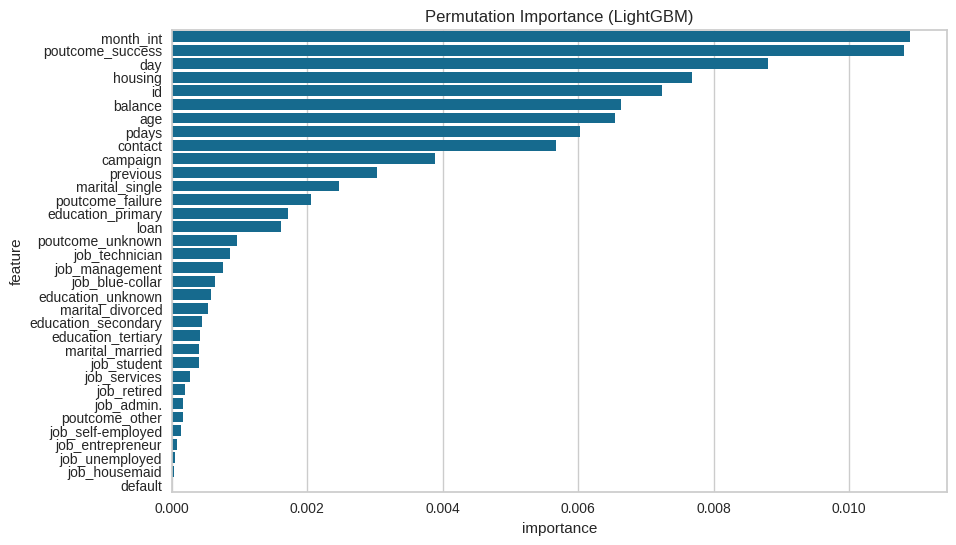

In [ ]:
# PyCaretのsetupを再度実行
clf1 = setup(data=train, target='y', session_id=123, fix_imbalance=True,
             preprocess=False, # 前処理をスキップ
             numeric_features = ['month_int'] + list(encoder.get_feature_names_out(['poutcome'])))  # 数値特徴量を指定
# 前処理済みのデータを使用するように設定

model = create_model('lightgbm')

# パーミュテーションインポータンスを計算
X_train = get_config('X_train')
y_train = get_config('y_train')

result = permutation_importance(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring='accuracy',
    n_repeats=10,
    random_state=123,
    n_jobs=-1
)

# 結果を可視化
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Permutation Importance (LightGBM)')
plt.show()

In [ ]:
# housingをワンホットエンコーディングする
train = pd.get_dummies(train, columns=['housing'])
test = pd.get_dummies(test, columns=['housing'])

In [ ]:
# # オブジェクト型のカラムを取得
# object_cols = train.select_dtypes(include=['object']).columns

# # ワンホットエンコーディング
# train = pd.get_dummies(train, columns=object_cols, drop_first=True) # 多重共線性を避けるためにdrop_first=True
# test = pd.get_dummies(test, columns=object_cols, drop_first=True)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 37)"
4,Transformed data shape,"(27100, 37)"
5,Transformed train set shape,"(18970, 37)"
6,Transformed test set shape,"(8130, 37)"
7,Numeric features,5


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9278,0.8222,0.2041,0.6000,0.3046,0.2761,0.3215
1,0.9331,0.8525,0.2177,0.7273,0.3351,0.3105,0.3745
2,0.9278,0.8338,0.1757,0.6341,0.2751,0.2497,0.3082
3,0.9299,0.7844,0.1824,0.6923,0.2888,0.2648,0.3318
4,0.9278,0.8623,0.1757,0.6341,0.2751,0.2497,0.3082
5,0.9336,0.8319,0.1959,0.8056,0.3152,0.2937,0.3773
6,0.9294,0.8373,0.2095,0.6458,0.3163,0.2892,0.3411
7,0.9304,0.8035,0.2095,0.6739,0.3196,0.2934,0.3503
8,0.9283,0.8320,0.1622,0.6667,0.2609,0.2376,0.3053


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

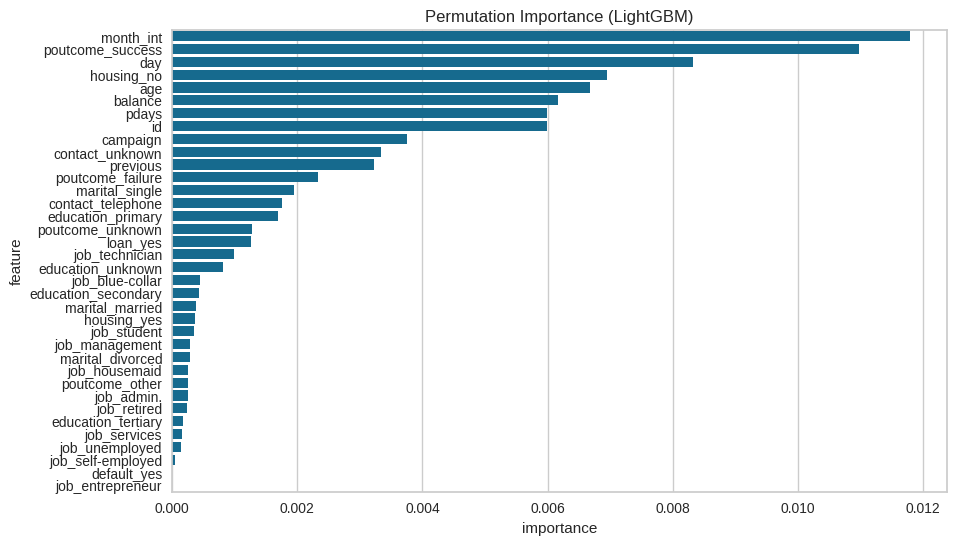

In [ ]:
# PyCaretのsetupを再度実行
clf1 = setup(data=train, target='y', session_id=123, fix_imbalance=True,
             preprocess=False, # 前処理をスキップ
             numeric_features = ['month_int'] + list(encoder.get_feature_names_out(['poutcome'])))  # 数値特徴量を指定
# 前処理済みのデータを使用するように設定

model = create_model('lightgbm')

# パーミュテーションインポータンスを計算
X_train = get_config('X_train')
y_train = get_config('y_train')

result = permutation_importance(
    estimator=model,
    X=X_train,
    y=y_train,
    scoring='accuracy',
    n_repeats=10,
    random_state=123,
    n_jobs=-1
)

# 結果を可視化
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Permutation Importance (LightGBM)')
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   27100 non-null  int64  
 1   age                  27100 non-null  int64  
 2   balance              27100 non-null  int64  
 3   day                  27100 non-null  int64  
 4   campaign             27100 non-null  int64  
 5   pdays                27100 non-null  int64  
 6   previous             27100 non-null  int64  
 7   y                    27100 non-null  int64  
 8   month_int            27100 non-null  int64  
 9   poutcome_failure     27100 non-null  float64
 10  poutcome_other       27100 non-null  float64
 11  poutcome_success     27100 non-null  float64
 12  poutcome_unknown     27100 non-null  float64
 13  job_admin.           27100 non-null  bool   
 14  job_blue-collar      27100 non-null  bool   
 15  job_entrepreneur     27100 non-null 

In [ ]:
# 前処理後のデータフレーム train を使用して setup を実行
numeric_features = train.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('y')
clf1 = setup(data=train, target='y', session_id=123,
             preprocess=False,
             numeric_features=numeric_features,
             fix_imbalance=True)

model = create_model('lightgbm')

# test データで予測
predictions = predict_model(model, data=test)

# 予測結果から提出用データフレームを作成
submission_df = pd.DataFrame({
    'id': range(len(predictions)),
    'y': predictions['prediction_label']  # prediction_label カラムに予測結果が入っていることを確認
})

# インデックスを設定
submission_df.set_index('id', inplace=True)

# CSV ファイルとして保存
submission_df.to_csv('submission.csv', header=False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 37)"
4,Transformed data shape,"(27100, 37)"
5,Transformed train set shape,"(18970, 37)"
6,Transformed test set shape,"(8130, 37)"
7,Numeric features,12


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9278,0.8222,0.2041,0.6000,0.3046,0.2761,0.3215
1,0.9331,0.8525,0.2177,0.7273,0.3351,0.3105,0.3745
2,0.9278,0.8338,0.1757,0.6341,0.2751,0.2497,0.3082
3,0.9299,0.7844,0.1824,0.6923,0.2888,0.2648,0.3318
4,0.9278,0.8623,0.1757,0.6341,0.2751,0.2497,0.3082
5,0.9336,0.8319,0.1959,0.8056,0.3152,0.2937,0.3773
6,0.9294,0.8373,0.2095,0.6458,0.3163,0.2892,0.3411
7,0.9304,0.8035,0.2095,0.6739,0.3196,0.2934,0.3503
8,0.9283,0.8320,0.1622,0.6667,0.2609,0.2376,0.3053


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predictions.head()

,id,age,balance,day,campaign,pdays,previous,month_int,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,default_yes,loan_yes,contact_telephone,contact_unknown,prediction_label,prediction_score
0,0,35,89043,7,2,184,2,2,0.0,0.0,1.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,1,0.8624
1,1,37,64372,7,3,241,0,7,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,0,0.9144
2,2,31,31606,15,2,47,0,5,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,0,0.9796
3,3,31,94826,27,2,490,0,5,0.0,0.0,0.0,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,0,0.9909
4,4,32,100401,7,1,686,0,1,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0,0.9450


In [ ]:
# 予測結果を predictions に格納
predictions = predict_model(tuned_model, data=test)

# 提出用データフレームを作成
submission_df = pd.DataFrame({
    'id': range(len(predictions)),  # 通し番号 (0 から始まる)
    'y': predictions['prediction_score']  # 予測確率 (カラム名は 'Yha' に変更)
})

# インデックスを設定
submission_df.set_index('id', inplace=True)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [ ]:
submission_df.to_csv('Sub_mission.csv')

In [ ]:
# 1. 既存特徴量の組み合わせ
train['age_balance'] = train['age'] * train['balance']
test['age_balance'] = test['age'] * test['balance']

# 2. 数値特徴量の離散化
train['age_group'] = pd.cut(train['age'], bins=[0, 20, 30, 40, 50, 60, np.inf], labels=False)
test['age_group'] = pd.cut(test['age'], bins=[0, 20, 30, 40, 50, 60, np.inf], labels=False)

# 3. ドメイン知識に基づいた特徴量 (季節要因)
# month_int はすでに作成済みのため、ここでは季節 (春夏秋冬) を表す特徴量を作成
train['season'] = pd.cut(train['month_int'], bins=[0, 3, 6, 9, 12], labels=['冬', '春', '夏', '秋'])
test['season'] = pd.cut(test['month_int'], bins=[0, 3, 6, 9, 12], labels=['冬', '春', '夏', '秋'])

# 季節をワンホットエンコーディング
train = pd.get_dummies(train, columns=['season'], drop_first=True)
test = pd.get_dummies(test, columns=['season'], drop_first=True)

In [ ]:
from pycaret.classification import *

# 前処理後のデータフレーム train を使用して setup を実行
numeric_features = train.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('y')
clf1 = setup(data=train, target='y', session_id=123,
             preprocess=False,
             numeric_features=numeric_features,
             fix_imbalance=True)

model = create_model('lightgbm')

# モデルのチューニング
tuned_model = tune_model(model)

# モデルの評価
evaluate_model(tuned_model)

# test データで予測
predictions = predict_model(tuned_model, data=test)

# 予測結果から提出用データフレームを作成
submission_df = pd.DataFrame({
    'id': range(len(predictions)),
    'y': predictions['prediction_label']  # prediction_label カラムに予測結果が入っていることを確認
})

# インデックスを設定
submission_df.set_index('id', inplace=True)

# CSV ファイルとして保存
submission_df.to_csv('submission.csv', header=False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 42)"
4,Transformed data shape,"(27100, 42)"
5,Transformed train set shape,"(18970, 42)"
6,Transformed test set shape,"(8130, 42)"
7,Numeric features,14


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9278,0.8274,0.1973,0.6042,0.2974,0.2696,0.3174
1,0.9315,0.8470,0.2177,0.6809,0.3299,0.3038,0.3597
2,0.9294,0.8314,0.2027,0.6522,0.3093,0.2827,0.3375
3,0.9278,0.7913,0.1757,0.6341,0.2751,0.2497,0.3082
4,0.9299,0.8605,0.1824,0.6923,0.2888,0.2648,0.3318
5,0.9341,0.8390,0.2162,0.7805,0.3386,0.3155,0.3893
6,0.9304,0.8373,0.2162,0.6667,0.3265,0.2998,0.3536
7,0.9273,0.8066,0.1892,0.6087,0.2887,0.2613,0.3119
8,0.9299,0.8315,0.1824,0.6923,0.2888,0.2648,0.3318


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9273,0.8265,0.1837,0.6000,0.2812,0.2542,0.3046
1,0.9341,0.8625,0.2313,0.7391,0.3523,0.3275,0.3901
2,0.9331,0.8495,0.2095,0.7561,0.3280,0.3045,0.3758
3,0.9294,0.8145,0.1622,0.7059,0.2637,0.2416,0.3163
4,0.9315,0.8690,0.1892,0.7368,0.3011,0.2781,0.3512
5,0.9346,0.8424,0.2230,0.7857,0.3474,0.3241,0.3970
6,0.9325,0.8386,0.1959,0.7632,0.3118,0.2892,0.3652
7,0.9288,0.8130,0.2095,0.6327,0.3147,0.2871,0.3367
8,0.9309,0.8290,0.2027,0.6977,0.3141,0.2892,0.3519


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [ ]:
from pycaret.classification import *

# 前処理後のデータフレーム train を使用して setup を実行
numeric_features = train.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('y')
clf1 = setup(data=train, target='y', session_id=123,
             preprocess=False,
             numeric_features=numeric_features,
             fix_imbalance=True)

model = create_model('lr')

# モデルのチューニング
tuned_model = tune_model(model)

# モデルの評価
evaluate_model(tuned_model)

# test データで予測
predictions = predict_model(tuned_model, data=test)

# 予測結果から提出用データフレームを作成
submission_df = pd.DataFrame({
    'id': range(len(predictions)),
    'y': predictions['prediction_label']  # prediction_label カラムに予測結果が入っていることを確認
})

# インデックスを設定
submission_df.set_index('id', inplace=True)

# CSV ファイルとして保存
submission_df.to_csv('submission2.csv', header=False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 42)"
4,Transformed data shape,"(27100, 42)"
5,Transformed train set shape,"(18970, 42)"
6,Transformed test set shape,"(8130, 42)"
7,Numeric features,14


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9225,0.7697,0.0544,0.5000,0.0982,0.0842,0.1457
1,0.9230,0.7668,0.0476,0.5385,0.0875,0.0759,0.1432
2,0.9225,0.7836,0.0270,0.5714,0.0516,0.0449,0.1120
3,0.9183,0.7164,0.0203,0.2308,0.0373,0.0250,0.0473
4,0.9230,0.7365,0.0270,0.6667,0.0519,0.0461,0.1236
5,0.9193,0.7728,0.0135,0.2222,0.0255,0.0167,0.0371
6,0.9209,0.7643,0.0338,0.4167,0.0625,0.0514,0.1007
7,0.9209,0.7045,0.0338,0.4167,0.0625,0.0514,0.1007
8,0.9230,0.7294,0.0541,0.5714,0.0988,0.0864,0.1586


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9225,0.7692,0.0476,0.5000,0.0870,0.0745,0.1363
1,0.9225,0.7667,0.0408,0.5000,0.0755,0.0645,0.1261
2,0.9225,0.7836,0.0270,0.5714,0.0516,0.0449,0.1120
3,0.9188,0.7163,0.0203,0.2500,0.0375,0.0261,0.0512
4,0.9225,0.7370,0.0135,0.6667,0.0265,0.0235,0.0874
5,0.9199,0.7730,0.0135,0.2500,0.0256,0.0178,0.0417
6,0.9220,0.7641,0.0338,0.5000,0.0633,0.0539,0.1145
7,0.9215,0.7046,0.0270,0.4444,0.0510,0.0424,0.0943
8,0.9230,0.7295,0.0473,0.5833,0.0875,0.0767,0.1503


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# age と balance の積
train['age_balance'] = train['age'] * train['balance']
test['age_balance'] = test['age'] * test['balance']

# campaign と previous の比率
train['campaign_per_previous'] = train['campaign'] / (train['previous'] + 1)  # ゼロ除算を避けるために +1
test['campaign_per_previous'] = test['campaign'] / (test['previous'] + 1)

In [ ]:
# job と marital の組み合わせ
train['job_marital'] = train['job'] + '_' + train['marital']
test['job_marital'] = test['job'] + '_' + test['marital']

# 新しい特徴量をワンホットエンコーディング
train = pd.get_dummies(train, columns=['job_marital'], drop_first=True)
test = pd.get_dummies(test, columns=['job_marital'], drop_first=True)

In [ ]:
# job 別の balance の平均値
train['job_mean_balance'] = train.groupby('job')['balance'].transform('mean')
test['job_mean_balance'] = test.groupby('job')['balance'].transform('mean')

# education 別の campaign の最大値
train['education_max_campaign'] = train.groupby('education')['campaign'].transform('max')
test['education_max_campaign'] = test.groupby('education')['campaign'].transform('max')

In [ ]:
from pycaret.classification import *

# 前処理後のデータフレーム train を使用して setup を実行
numeric_features = train.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('y')
clf1 = setup(data=train, target='y', session_id=123,
             preprocess=False,
             numeric_features=numeric_features,
             fix_imbalance=True)

model = create_model('lightgbm')

# モデルのチューニング
tuned_model = tune_model(model)

# モデルの評価
evaluate_model(tuned_model)

# test データで予測
predictions = predict_model(tuned_model, data=test)

# 予測結果から提出用データフレームを作成
submission_df = pd.DataFrame({
    'id': range(len(predictions)),
    'y': predictions['prediction_label']  # prediction_label カラムに予測結果が入っていることを確認
})

# インデックスを設定
submission_df.set_index('id', inplace=True)

# CSV ファイルとして保存
submission_df.to_csv('submission3.csv', header=False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 61)"
4,Transformed data shape,"(27100, 61)"
5,Transformed train set shape,"(18970, 61)"
6,Transformed test set shape,"(8130, 61)"
7,Numeric features,17
8,Categorical features,6


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9257,0.8184,0.1837,0.5625,0.2769,0.2482,0.2923
1,0.9341,0.8470,0.2381,0.7292,0.3590,0.3335,0.3927
2,0.9283,0.8391,0.1959,0.6304,0.2990,0.2720,0.3247
3,0.9267,0.7890,0.1486,0.6286,0.2404,0.2171,0.2814
4,0.9331,0.8571,0.2095,0.7561,0.3280,0.3045,0.3758
5,0.9346,0.8404,0.2095,0.8158,0.3333,0.3114,0.3933
6,0.9315,0.8200,0.1959,0.7250,0.3085,0.2848,0.3540
7,0.9283,0.8018,0.1959,0.6304,0.2990,0.2720,0.3247
8,0.9315,0.8281,0.1892,0.7368,0.3011,0.2781,0.3512


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9299,0.8261,0.2109,0.6458,0.3179,0.2909,0.3425
1,0.9352,0.8597,0.2381,0.7609,0.3627,0.3383,0.4029
2,0.9320,0.8483,0.2230,0.7021,0.3385,0.3126,0.3709
3,0.9288,0.8092,0.1622,0.6857,0.2623,0.2396,0.3107
4,0.9299,0.8672,0.1892,0.6829,0.2963,0.2716,0.3352
5,0.9352,0.8423,0.2500,0.7551,0.3756,0.3504,0.4111
6,0.9336,0.8355,0.1892,0.8235,0.3077,0.2869,0.3755
7,0.9278,0.8109,0.2095,0.6078,0.3116,0.2829,0.3284
8,0.9331,0.8225,0.2162,0.7442,0.3351,0.3109,0.3783


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 多項式特徴量を生成 (次数=2)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train[['age', 'balance']])  # 対象となる特徴量を指定
X_test_poly = poly.transform(X_test[['age', 'balance']])

# 生成された特徴量をデータフレームに追加
train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(['age', 'balance']))
test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(['age', 'balance']))

train = pd.concat([train, train_poly_df], axis=1)
test = pd.concat([test, test_poly_df], axis=1)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K近傍法モデルを作成
knn = KNeighborsClassifier(n_neighbors=5)  # 近傍データの数

# 特徴量を作成
knn.fit(X_train[['age', 'balance']], y_train)  # 対象となる特徴量を指定
train['knn_feature'] = knn.predict_proba(X_train[['age', 'balance']])[:, 1]  # 1の確率を特徴量として使用
test['knn_feature'] = knn.predict_proba(X_test[['age', 'balance']])[:, 1]

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ランダムフォレストモデルを作成
rf = RandomForestClassifier()

# 特徴量の重要度を計算
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# 重要度の低い特徴量を削除
threshold = 0.01  # 重要度の閾値
selected_features = X_train.columns[importances > threshold]
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [ ]:
from sklearn.preprocessing import StandardScaler

# 標準化を行うカラムを指定
numeric_features = ['age', 'balance', 'campaign', 'pdays', 'previous']

# StandardScalerのインスタンスを作成
scaler = StandardScaler()

# trainデータでfit_transform、testデータでtransform
train[numeric_features] = scaler.fit_transform(train[numeric_features])
test[numeric_features] = scaler.transform(test[numeric_features])

In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  27100 non-null  int64  
 1   age                                 27100 non-null  float64
 2   job                                 27100 non-null  object 
 3   marital                             27100 non-null  object 
 4   education                           27100 non-null  object 
 5   default                             27100 non-null  object 
 6   balance                             27100 non-null  float64
 7   loan                                27100 non-null  object 
 8   contact                             27100 non-null  object 
 9   day                                 27100 non-null  int64  
 10  campaign                            27100 non-null  float64
 11  pdays                               27100

In [ ]:
from pycaret.classification import *

# 前処理後のデータフレーム train を使用して setup を実行
numeric_features = train.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('y')
clf1 = setup(data=train, target='y', session_id=123,
             preprocess=False,
             numeric_features=numeric_features,
             fix_imbalance=True)

# LightGBMモデルを作成
lightgbm_model = create_model('lightgbm')

# tune_modelでreg_alphaを調整
tuned_lightgbm_model = tune_model(lightgbm_model, custom_grid = {'reg_alpha': np.logspace(-4, 4, 20)})

# モデルの評価
evaluate_model(tuned_lightgbm_model)

# test データで予測
predictions = predict_model(tuned_lightgbm_model, data=test)

# 予測結果から提出用データフレームを作成
submission_df = pd.DataFrame({
    'id': range(len(predictions)),
    'y': predictions['prediction_label']  # prediction_label カラムに予測結果が入っていることを確認
})

# インデックスを設定
submission_df.set_index('id', inplace=True)

# CSV ファイルとして保存
submission_df.to_csv('submission3.csv', header=False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 61)"
4,Transformed data shape,"(27100, 61)"
5,Transformed train set shape,"(18970, 61)"
6,Transformed test set shape,"(8130, 61)"
7,Numeric features,17
8,Categorical features,6


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9267,0.8247,0.2041,0.5769,0.3015,0.2720,0.3136
1,0.9336,0.8502,0.2177,0.7442,0.3368,0.3127,0.3797
2,0.9299,0.8334,0.2027,0.6667,0.3109,0.2849,0.3421
3,0.9246,0.7904,0.1351,0.5714,0.2186,0.1945,0.2522
4,0.9299,0.8562,0.1959,0.6744,0.3037,0.2783,0.3387
5,0.9346,0.8422,0.2095,0.8158,0.3333,0.3114,0.3933
6,0.9294,0.8146,0.1959,0.6591,0.3021,0.2762,0.3339
7,0.9294,0.8054,0.1824,0.6750,0.2872,0.2628,0.3267
8,0.9299,0.8229,0.1757,0.7027,0.2811,0.2579,0.3285


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9294,0.8237,0.2109,0.6327,0.3163,0.2888,0.3381
1,0.9352,0.8456,0.2313,0.7727,0.3560,0.3322,0.4007
2,0.9288,0.8329,0.1892,0.6512,0.2932,0.2675,0.3255
3,0.9283,0.7895,0.1757,0.6500,0.2766,0.2518,0.3130
4,0.9320,0.8577,0.2027,0.7317,0.3175,0.2935,0.3623
5,0.9346,0.8299,0.2027,0.8333,0.3261,0.3049,0.3917
6,0.9331,0.8257,0.2095,0.7561,0.3280,0.3045,0.3758
7,0.9278,0.8072,0.1892,0.6222,0.2902,0.2634,0.3163
8,0.9304,0.8237,0.1757,0.7222,0.2826,0.2600,0.3341


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.classification import *

# 前処理後のデータフレーム train を使用して setup を実行
numeric_features = train.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('y')
clf1 = setup(data=train, target='y', session_id=123,
             preprocess=False,
             numeric_features=numeric_features,
             fix_imbalance=True)

# LightGBMモデルを作成
lightgbm_model = create_model('lightgbm')

# tune_modelでreg_alphaを調整、foldパラメータで交差検証の分割数を指定
tuned_lightgbm_model = tune_model(lightgbm_model,
                                  custom_grid={'reg_alpha': np.logspace(-4, 4, 20)},
                                  fold=5)  # 5分割交差検証 20)})

# モデルの評価
evaluate_model(tuned_lightgbm_model)

# test データで予測
predictions = predict_model(tuned_lightgbm_model, data=test)

# 予測結果から提出用データフレームを作成
submission_df = pd.DataFrame({
    'id': range(len(predictions)),
    'y': predictions['prediction_label']  # prediction_label カラムに予測結果が入っていることを確認
})

# インデックスを設定
submission_df.set_index('id', inplace=True)

# CSV ファイルとして保存
submission_df.to_csv('submission4.csv', header=False)

,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Original data shape,"(27100, 61)"
4,Transformed data shape,"(27100, 61)"
5,Transformed train set shape,"(18970, 61)"
6,Transformed test set shape,"(8130, 61)"
7,Numeric features,17
8,Categorical features,6


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9267,0.8247,0.2041,0.5769,0.3015,0.2720,0.3136
1,0.9336,0.8502,0.2177,0.7442,0.3368,0.3127,0.3797
2,0.9299,0.8334,0.2027,0.6667,0.3109,0.2849,0.3421
3,0.9246,0.7904,0.1351,0.5714,0.2186,0.1945,0.2522
4,0.9299,0.8562,0.1959,0.6744,0.3037,0.2783,0.3387
5,0.9346,0.8422,0.2095,0.8158,0.3333,0.3114,0.3933
6,0.9294,0.8146,0.1959,0.6591,0.3021,0.2762,0.3339
7,0.9294,0.8054,0.1824,0.6750,0.2872,0.2628,0.3267
8,0.9299,0.8229,0.1757,0.7027,0.2811,0.2579,0.3285


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9304,0.8345,0.2203,0.6566,0.3299,0.3027,0.3538
1,0.9294,0.8179,0.1898,0.6588,0.2947,0.2693,0.3285
2,0.9344,0.8462,0.2095,0.8052,0.3324,0.3102,0.3902
3,0.9291,0.8201,0.1926,0.6552,0.2977,0.2718,0.3297
4,0.9341,0.8405,0.2230,0.7674,0.3455,0.3217,0.3915
Mean,0.9315,0.8319,0.2070,0.7086,0.3201,0.2952,0.3587
Std,0.0023,0.0112,0.0137,0.0645,0.0202,0.0210,0.0277


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
from pycaret.classification import load_model, predict_model

# 保存したモデル 'my_model' を読み込む
loaded_model = load_model('my_model')

# 読み込んだモデルを使って、新しいデータ (new_data) に対する予測を行う
# preprocess=True を指定することで、setup() で設定した前処理が new_data にも適用されます。
predictions = predict_model(loaded_model, data=new_data, preprocess=True)